In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import os

In [3]:
pos = np.genfromtxt("scratch/positions.out")
spins = np.genfromtxt("scratch/lattice.out3")
x_magz = np.array([pos[:,0], spins[:,2]]).T


OSError: scratch/lattice.out3 not found.

In [8]:
def tanh_model(xs, x0, delta, me):
    return me*np.tanh(np.pi*(xs-x0)/delta)

def fit_domain_wall(xs, magzs):
    (fit_x0, fit_delta, fit_me), res = scipy.optimize.curve_fit(tanh_model, xs, magzs, p0=[100, 20, 1])
    return (fit_x0, fit_delta, fit_me)

    

In [5]:
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(x_magz[:,0], x_magz[:,1], bins=200)

plt.scatter(x_magz[:,0], x_magz[:,1])
plt.plot(bin_edges[1:], bin_means, color="black")

NameError: name 'x_magz' is not defined

In [6]:
plt.scatter(x_magz[:,0], x_magz[:,1])

NameError: name 'x_magz' is not defined

In [7]:
plt.plot(bin_edges[1:], bin_means)

NameError: name 'bin_edges' is not defined

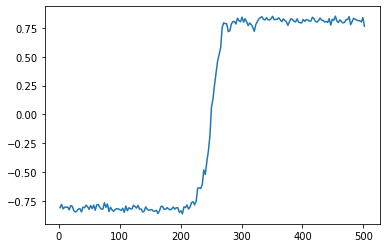

MovieWriter ffmpeg unavailable; using Pillow instead.


domain wall width [nm]:  11.821534157690518
domain wall width [nm]:  14.614726079058364
domain wall width [nm]:  14.631944724893815
domain wall width [nm]:  22.573519001950476
domain wall width [nm]:  24.600061597903487
domain wall width [nm]:  24.002099020729084
domain wall width [nm]:  25.78096767200883
domain wall width [nm]:  28.115700986237368
domain wall width [nm]:  28.581818036109603
domain wall width [nm]:  36.30290246780335


In [22]:
from matplotlib.animation import FuncAnimation

expdir = "scratch/run_wall_5x5/"
n = 50

pos = np.genfromtxt(os.path.join(expdir, "positions.out"))
spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(0)))
xs = pos[:,0]
ys = spins[:,2]
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(xs, ys, bins=200)


fig, ax = plt.subplots()
ln, = ax.plot(bin_edges[1:], bin_means)

def init():
    return ln,

def update(i):
    spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(i)))
    xs = pos[:,0]
    ys = spins[:,2]
    bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(xs, ys, bins=200)
    scale = 2.47e-1
    x0, delta, ms = fit_domain_wall(xs, ys)
    print("domain wall width [nm]: ", scale*delta)
    ln.set_data(bin_edges[1:], bin_means)
    return ln,

ani = FuncAnimation(fig, update, frames=n,
                    init_func=init, blit=True)
plt.show()
ani.save("animation.gif")
spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(n-1)))
xs = pos[:,0]
ys = spins[:,2]
scale = 2.47e-1
# x0, delta, ms = fit_domain_wall(xs, ys)
# print("domain wall width [nm]: ", scale*delta)

25.20136372457592

96.54877327001383